# Master Thesis Analysis Report

Analysis of the participants using two different user interfaces. Participants had to fill out S-UEQ, SUS and RAW-TLX after a task on Garmin and a task on Strava. Each participant represents 2 rows in a dataframe - one row represents self-reports for Garmin (1) and one for Strava (2). To do an analysis, data has to be split into 3 distinct questionnaires.

In [1]:
# import pandas as pd
# import seaborn as sns
from analysis.analyzer import AnalysisManager
from data_manager.manager import DataManager


## Getting data ready

Reading data from a CSV file and changing values to numeric; column 1 is user ID, column 2 is category (1 - Garmin, 2 - Strava)

In [2]:
data_manager = DataManager(
    responses_data_path="anketa_working.csv", 
    pupil_data_path=None
    )
#because first 2 rows have incorrect data we wil drop them in this case
cleaned_data = data_manager.get_clean_data().iloc[2:,:]
cleaned_data.head(3)

,user_id,UI,Q4a,Q4b,Q4c,Q4d,Q4e,Q4f,Q4g,Q4h,...,Q6g,Q6h,Q6i,Q6j,Q8,Q9,Q10,Q11,Q12,Q13
2,29622,2,5,6,6,2,5,6,5,5,...,4,4,1,4,12,0,5,12,15,7
3,29622,1,6,6,6,7,3,5,6,6,...,5,1,4,2,8,0,5,5,8,2
4,94249,2,6,5,5,6,4,4,5,5,...,4,2,5,1,1,0,1,0,1,1


Splitting data into:
* short-user experience questionnaire (SUEQ)
* system usability scale (SUEQ)
* NASA task load index (NASA-TLX)

In [3]:
sueq, sus, tlx = data_manager.split_data()
questionnaire_dict= {"SUEQ" : sueq, 
                     "SUS" : sus, 
                     "TLX" : tlx}
sueq.head(3)

,user_id,UI,Q4a,Q4b,Q4c,Q4d,Q4e,Q4f,Q4g,Q4h
0,83213,1,5,5,6,6,6,6,4,3
1,83213,1,-1,-1,-1,-1,-1,-1,-1,-1
2,29622,2,5,6,6,2,5,6,5,5


## Scoring data
Initializing class Analysis and performing a scoring on each questionnaire.

In [4]:
analyst=AnalysisManager(sueq, sus, tlx)

In [5]:
score_tlx=analyst.score_tlx()
score_tlx.head()

,User ID,Interface Category,Mean TLX Score
0,83213,1,4.166667
1,83213,1,-1.000000
2,29622,2,8.500000
3,29622,1,4.666667
4,94249,2,0.666667


In [6]:
score_sus=analyst.score_sus()
score_sus.head()

,User ID,Interface Category,Mean SUS Score
0,83213,1,62.5
1,83213,1,50.0
2,29622,2,45.0
3,29622,1,87.5
4,94249,2,80.0


In [7]:
score_sueq=analyst.score_ueq_short()
score_sueq.head()

,User ID,Interface Category,Overall Pragmatic Quality,Overall Hedonic Quality,Overall UEQ Score
0,83213,1,5.50,4.75,5.125
1,83213,1,-1.00,-1.00,-1.000
2,29622,2,4.75,5.25,5.000
3,29622,1,6.25,5.00,5.625
4,94249,2,5.50,4.50,5.000


In [8]:
combined_scores=analyst.combine_scores(score_sueq, score_sus, score_tlx)
combined_scores.head()

,User ID,Interface Category,Overall Pragmatic Quality,Overall Hedonic Quality,Overall UEQ Score,Mean SUS Score,Mean TLX Score
0,14230,1,6.25,5.75,6.000,92.5,1.833333
1,14230,2,5.50,5.25,5.375,80.0,3.166667
2,15629,1,4.00,3.75,3.875,62.5,5.000000
3,15629,2,6.00,5.00,5.500,80.0,3.666667
4,16063,1,5.00,4.25,4.625,82.5,6.500000


In [9]:
combined_scores.to_csv('combined_scores.csv', index=False)

## Visualizing data
Below is a chart of average scores on Questionnaires based on Interface. From the visualization alone we can see no significant difference in scores depending on interface

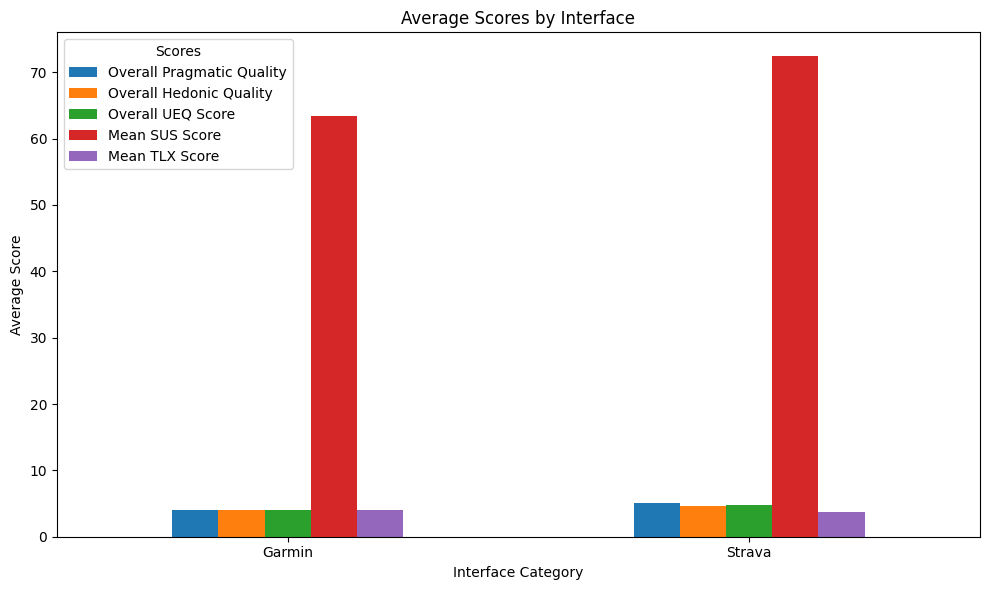

In [10]:
analyst.visualize_scores(combined_scores)

In [12]:
t_statistics=analyst.t_stat(combined_scores)
t_statistics

,Measure,T-Statistic,P-Value
0,Overall Pragmatic Quality,-2.2105,0.0318
1,Overall Hedonic Quality,-1.2465,0.2187
2,Overall UEQ Score,-1.8896,0.0652
3,Mean SUS Score,-1.7505,0.0855
4,Mean TLX Score,0.2848,0.7769



### Findings:
The analysis reveals a statistically significant difference in **pragmatic quality**, while the other measures do not show significant differences. However, the **UEQ score** and **SUS score** exhibit trends that might become significant with a larger sample size or additional testing. The **TLX score** shows no evidence of differences.